# Examen Final de Diseño de Bases de Datos 2

## Carga de Datos

In [66]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'2017_-_2018_Graduation_Outcomes_Citywide.csv')
df

,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,Total Regents % of cohort,Total Regents % of grads,...,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort,SACC (IEP Diploma) #,SACC (IEP Diploma) % of cohort,TASC (GED) #,TASC (GED) % of cohort
0,Gender by Ethnicity,Female Asian,2014,4 year August,6216,5708,91.8,5589,89.9,97.9,...,1.9,2.1,347,5.6,147,2.4,8,0.1,6,0.1
1,Gender by Ethnicity,Female Asian,2013,4 year August,6038,5534,91.7,5449,90.2,98.5,...,1.4,1.5,343,5.7,136,2.3,11,0.2,12,0.2
2,Gender by Ethnicity,Female Asian,2012,4 year August,5965,5375,90.1,5301,88.9,98.6,...,1.2,1.4,405,6.8,165,2.8,12,0.2,8,0.1
3,Gender by Ethnicity,Female Asian,2011,4 year August,6014,5359,89.1,5311,88.3,99.1,...,0.8,0.9,445,7.4,189,3.1,14,0.2,6,0.1
4,Gender by Ethnicity,Female Asian,2010,4 year August,6139,5304,86.4,5250,85.5,99.0,...,0.9,1.0,538,8.8,264,4.3,21,0.3,9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Gender by Ethnicity,Male White,2005,6 year June,5142,3961,77.0,3222,62.7,81.3,...,14.4,18.7,198,3.9,732,14.2,128,2.5,120,2.3
692,Gender by Ethnicity,Male White,2004,6 year June,5221,3953,75.7,3190,61.1,80.7,...,14.6,19.3,244,4.7,849,16.3,124,2.4,46,0.9
693,Gender by Ethnicity,Male White,2003,6 year June,5411,3919,72.4,3102,57.3,79.2,...,15.1,20.8,172,3.2,1109,20.5,132,2.4,75,1.4
694,Gender by Ethnicity,Male White,2002,6 year June,6003,4301,71.6,3302,55.0,76.8,...,17.0,23.7,195,3.2,1295,21.6,96,1.6,79,1.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Demographic Category              696 non-null    object
 1   Demographic Variable              696 non-null    object
 2   Cohort Year                       696 non-null    int64 
 3   Cohort                            696 non-null    object
 4   Total Cohort #                    696 non-null    int64 
 5   Total Grads #                     696 non-null    object
 6   Total Grads % of cohort           696 non-null    object
 7   Total Regents #                   696 non-null    object
 8   Total Regents % of cohort         696 non-null    object
 9   Total Regents % of grads          696 non-null    object
 10  Advanced Regents #                696 non-null    object
 11  Advanced Regents % of cohort      696 non-null    object
 12  Advanced Regents % of 

## Datos Descriptivos

In [3]:
df.describe()

,Cohort Year,Total Cohort #
count,696.000000,696.000000
mean,2007.741379,6349.739943
std,3.653607,5479.390538
min,2001.000000,1.000000
25%,2005.000000,241.750000
50%,2008.000000,5460.000000
75%,2011.000000,12572.000000
max,2014.000000,15830.000000


#### Aqui puedo ver la estadistica descriptiva de mi dataframe original (media, desviacion estandar, etc)

In [6]:
faltantes = []
for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna
    atributo["porcentaje"] = np.mean(df[columna].isnull())*100
    atributo["cantidad"] = np.sum(df[columna].isnull())
    faltantes.append(atributo)  
faltantes_df = pd.DataFrame(faltantes)
faltantes_df

,columna,porcentaje,cantidad
0,Demographic Category,0.0,0
1,Demographic Variable,0.0,0
2,Cohort Year,0.0,0
3,Cohort,0.0,0
4,Total Cohort #,0.0,0
5,Total Grads #,0.0,0
6,Total Grads % of cohort,0.0,0
7,Total Regents #,0.0,0
8,Total Regents % of cohort,0.0,0
9,Total Regents % of grads,0.0,0


In [15]:
df1 = df.groupby(['Demographic Variable', 'Cohort Year']).agg({'Total Cohort #':"sum", "Total Regents % of cohort": 'min',"Still Enrolled % of cohort": 'max'})
df1

Total Cohort # Total Regents % of cohort  \
Demographic Variable Cohort Year                                             
Female Asian         2001                  14085                      59.5   
                     2002                  15171                      63.2   
                     2003                  14935                      69.5   
                     2004                  20756                      72.0   
                     2005                  21232                      74.9   
...                                          ...                       ...   
Male White           2010                  27355                      69.7   
                     2011                  25880                      72.3   
                     2012                  26574                      71.3   
                     2013                  21938                      73.8   
                     2014                  11142                      73.3   

                                 Still Enrolled % of cohort  
Demographic Variable Cohort Year                             
Female Asian         2001                               4.8  
                     2002                               4.6  
                     2003                               3.8  
                     2004                               3.5  
                     2005                               9.1  
...                                                     ...  
Male White           2010                               7.4  
                     2011                               7.9  
                     2012                               8.2  
                     2013                               7.7  
                     2014                              16.1  

[168 rows x 3 columns]

<AxesSubplot:xlabel='Cohort Year', ylabel='Total Regents %'>

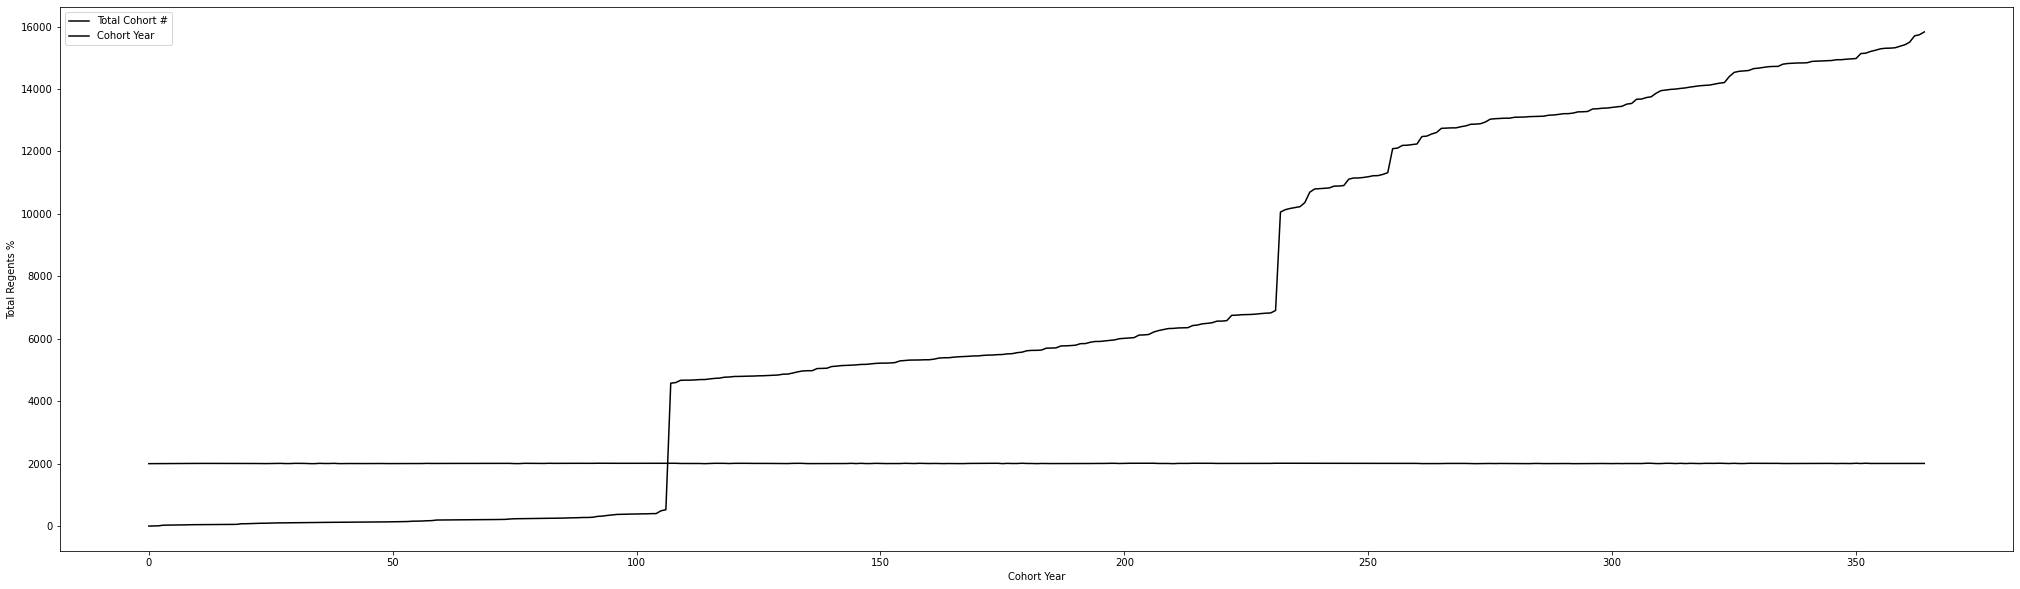

In [65]:
df_cantidad = df.groupby('Total Cohort #', as_index = False)[['Cohort Year']].mean()
df_cantidad  
df_cantidad.plot(figsize=(35,10), color="black", xlabel = 'Cohort Year', ylabel = "Total Regents %")
# DataFrame para ver cual fue el cohorte mas alto

### La idea era mostrar el total de Cohortes por año ordenados de mayor a menor

### Promedio de cohortes por año

,total
Cohort Year,
2001,36
2002,36
2003,36
2004,48
2005,48
2006,60
2007,60
2008,60
2009,60


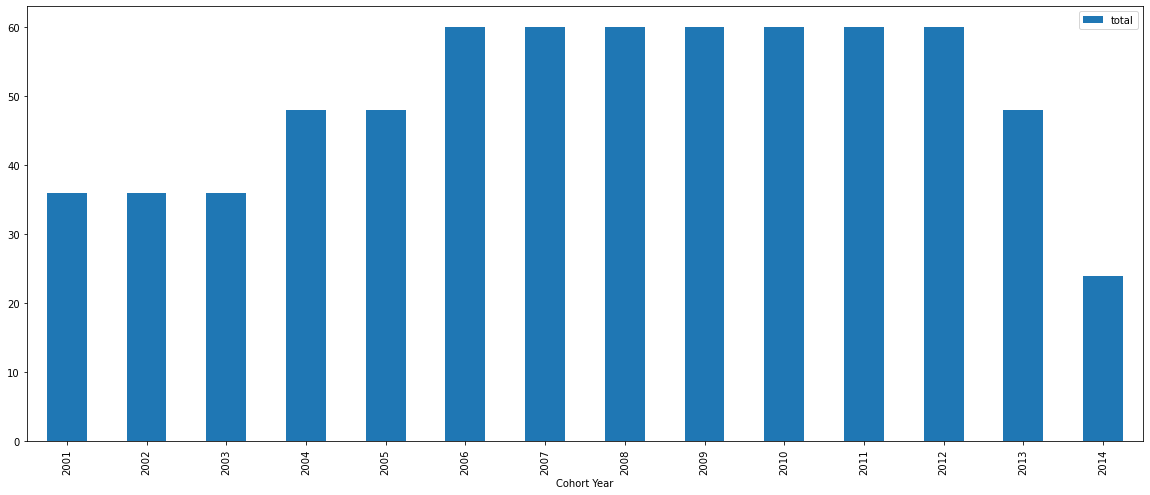

In [54]:
groups = ['Cohort Year']
df2 = df.groupby( groups).agg(total = ('Total Cohort #', 'count'))
df2.plot(kind='bar', figsize=(20,8))
df2